# 1. Import library:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 2. Reading data:

In [5]:
train_df = pd.read_csv('/kaggle/input/mydshahed/Train.csv')

In [6]:
train_df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [7]:
train_df.tail()

,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


In [8]:
train_df.shape

(40000, 2)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


# 3. EDA:

In [14]:
train_df.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
train_df.duplicated().sum()

277

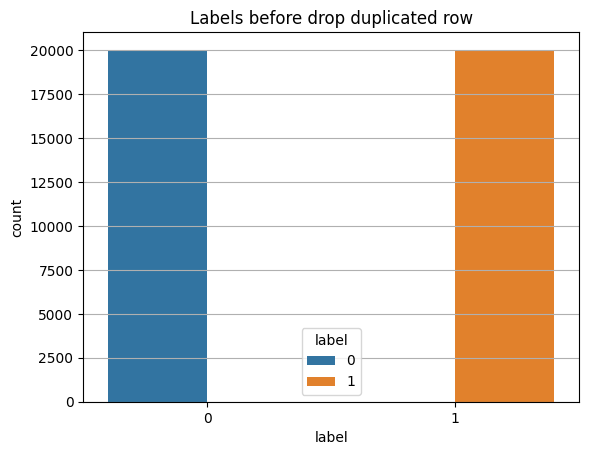

In [16]:
plt.grid()
sns.countplot(x=train_df['label'], hue=train_df['label'])
plt.title('Labels before drop duplicated row')
plt.show()

In [17]:
train_df.drop_duplicates(inplace = True)

In [18]:
train_df.reset_index(inplace=True)

In [19]:
train_df.drop('index', inplace = True, axis = 1)

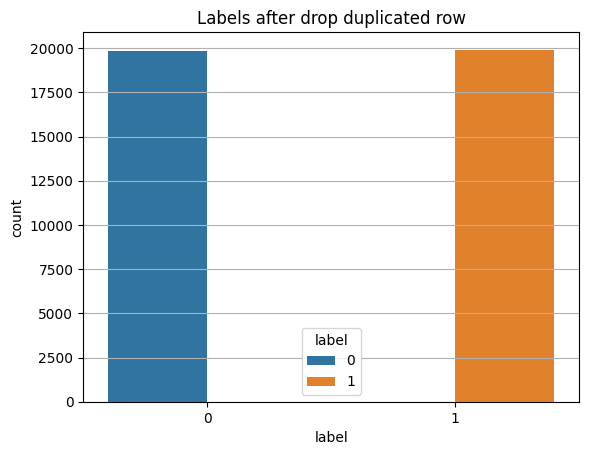

In [20]:
plt.grid()
sns.countplot(x=train_df['label'], hue=train_df['label'])
plt.title('Labels after drop duplicated row')
plt.show()

## Plot the most common word for each class

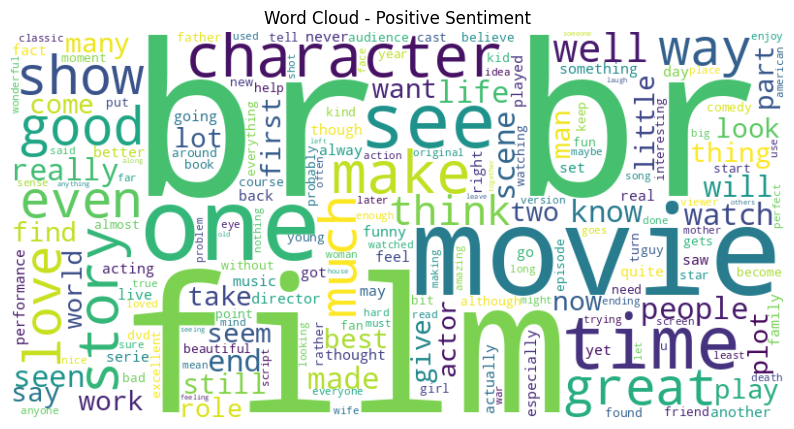

In [23]:
from wordcloud import WordCloud

positive_tweets = train_df[train_df['label'] == 1]['text']

positive_text = ' '.join(positive_tweets)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

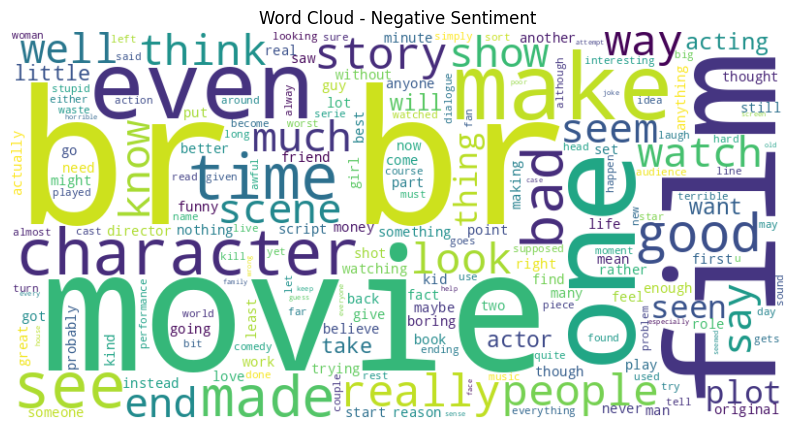

In [24]:
negative_tweets = train_df[train_df['label'] == 0]['text']

negative_text = ' '.join(negative_tweets)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()

# 4. Data Cleaning:

## Convert all the data to lower case

In [21]:
train_df = train_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [22]:
train_df.head()

,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [25]:
# Take a look to first 3 rows
for i in range(3):
  display(train_df['text'][i])

'i grew up (b. 1965) watching and loving the thunderbirds. all my mates at school watched. we played "thunderbirds" before school, during lunch and after school. we all wanted to be virgil or scott. no one wanted to be alan. counting down from 5 became an art form. i took my children to see the movie hoping they would get a glimpse of what i loved as a child. how bitterly disappointing. the only high point was the snappy theme tune. not that it could compare with the original score of the thunderbirds. thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created. jonatha frakes should hand in his directors chair, his version was completely hopeless. a waste of film. utter rubbish. a cgi remake may be acceptable but replacing marionettes with homo sapiens subsp. sapiens was a huge error of judgment.'

"when i put this movie in my dvd player, and sat down with a coke and some chips, i had some expectations. i was hoping that this movie would contain some of the strong-points of the first movie: awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. but, to my disappointment, not any of this is to be found in atlantis: milo's return. had i read some reviews first, i might not have been so let down. the following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />when the first scene appears, your in for a shock if you just picked atlantis: milo's return from the display-case at your local videoshop (or whatever), and had the expectations i had. the music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (with the exception of a few characters, like the voice of sweet). the actual drawings isnt that bad, 

'why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? replace woodstock with the civil war and the apollo moon-landing with the titanic sinking and you\'ve got as realistic a flick as this formulaic soap opera populated entirely by low-life trash. is this what kids who were too young to be allowed to go to woodstock and who failed grade school composition do? "i\'ll show those old meanies, i\'ll put out my own movie and prove that you don\'t have to know nuttin about your topic to still make money!" yeah, we already know that. the one thing watching this film did for me was to give me a little insight into underclass thinking. the next time i see a slut in a bar who looks like diane lane, i\'m running the other way. it\'s child abuse to let parents that worthless raise kids. it\'s audience abuse to simply stick woodstock and the moonlanding into a flick as if that ipso facto means the film portrays 1969.'

In [26]:
#Made a new column contain the number of letter in every row
train_df['letter_count'] = train_df['text'].apply(len)
train_df.head(3)

,text,label,letter_count
0,i grew up (b. 1965) watching and loving the th...,0,874
1,"when i put this movie in my dvd player, and sa...",0,1811
2,why do people who do not know what a particula...,0,983


In [27]:
#print the longest text
train_df.iloc[train_df['letter_count'].idxmax()]

text            match 1: tag team table match bubba ray and sp...
label                                                           1
letter_count                                                13704
Name: 6370, dtype: object

## Remove numbers and every strang symbol

In [28]:
import re

def remove_strang(data):

    for i in range(len(data)):

      text = data[i]

      text = re.sub("[^a-z\s\']", "", text)

      pattern = r'\b\w*(\w)\1{2, }\w*\\b|\b\w{1}\b'

      data[i] = re.sub(pattern, '', text)

    return data

In [29]:
text = remove_strang(train_df['text'])

In [30]:
text

0         grew up   watching and loving the thunderbird...
1        when  put this movie in my dvd player and sat ...
2        why do people who do not know what  particular...
3        even though  have great interest in biblical m...
4        im  die hard dads army fan and nothing will ev...
                               ...                        
39718    western union is something of  forgotten class...
39719    this movie is an incredible piece of work it e...
39720    my wife and  watched this movie because we pla...
39721    when  first watched flatliners  was amazed it ...
39722    why would this film be so good but only gross ...
Name: text, Length: 39723, dtype: object

In [31]:
for i in range(3):

  display(text[i])

' grew up   watching and loving the thunderbirds all my mates at school watched we played thunderbirds before school during lunch and after school we all wanted to be virgil or scott no one wanted to be alan counting down from  became an art form  took my children to see the movie hoping they would get  glimpse of what  loved as  child how bitterly disappointing the only high point was the snappy theme tune not that it could compare with the original score of the thunderbirds thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created jonatha frakes should hand in his directors chair his version was completely hopeless  waste of film utter rubbish  cgi remake may be acceptable but replacing marionettes with homo sapiens subsp sapiens was  huge error of judgment'

"when  put this movie in my dvd player and sat down with  coke and some chips  had some expectations  was hoping that this movie would contain some of the strongpoints of the first movie awsome animation good flowing story excellent voice cast funny comedy and  kickass soundtrack but to my disappointment not any of this is to be found in atlantis milo' return had  read some reviews first  might not have been so let down the following paragraph will be directed to those who have seen the first movie and who enjoyed it primarily for the points mentionedbr br when the first scene appears your in for  shock if you just picked atlantis milo' return from the displaycase at your local videoshop or whatever and had the expectations  had the music feels as  bad imitation of the first movie and the voice cast has been replaced by  not so fitting one with the exception of  few characters like the voice of sweet the actual drawings isnt that bad but the animation in particular is  sad sight the st

"why do people who do not know what  particular time in the past was like feel the need to try to define that time for others replace woodstock with the civil war and the apollo moonlanding with the titanic sinking and you've got as realistic  flick as this formulaic soap opera populated entirely by lowlife trash is this what kids who were too young to be allowed to go to woodstock and who failed grade school composition do 'll show those old meanies 'll put out my own movie and prove that you don' have to know nuttin about your topic to still make money yeah we already know that the one thing watching this film did for me was to give me  little insight into underclass thinking the next time  see  slut in  bar who looks like diane lane ' running the other way it' child abuse to let parents that worthless raise kids it' audience abuse to simply stick woodstock and the moonlanding into  flick as if that ipso facto means the film portrays "

In [32]:
text[0]

' grew up   watching and loving the thunderbirds all my mates at school watched we played thunderbirds before school during lunch and after school we all wanted to be virgil or scott no one wanted to be alan counting down from  became an art form  took my children to see the movie hoping they would get  glimpse of what  loved as  child how bitterly disappointing the only high point was the snappy theme tune not that it could compare with the original score of the thunderbirds thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created jonatha frakes should hand in his directors chair his version was completely hopeless  waste of film utter rubbish  cgi remake may be acceptable but replacing marionettes with homo sapiens subsp sapiens was  huge error of judgment'

In [33]:
len(text)

39723

## Make a Tokenization

In [34]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize


def tokenization(text):

        token_text = []
        for i in range(len(text)):
            texts = text[i]
            token_texts = word_tokenize(texts)
            token_text.append(token_texts)
        return token_text



[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
tokenize_text = tokenization(text)

In [ ]:
tokenize_text

In [39]:
tokenize_text[0]

['grew',
 'up',
 'watching',
 'and',
 'loving',
 'the',
 'thunderbirds',
 'all',
 'my',
 'mates',
 'at',
 'school',
 'watched',
 'we',
 'played',
 'thunderbirds',
 'before',
 'school',
 'during',
 'lunch',
 'and',
 'after',
 'school',
 'we',
 'all',
 'wanted',
 'to',
 'be',
 'virgil',
 'or',
 'scott',
 'no',
 'one',
 'wanted',
 'to',
 'be',
 'alan',
 'counting',
 'down',
 'from',
 'became',
 'an',
 'art',
 'form',
 'took',
 'my',
 'children',
 'to',
 'see',
 'the',
 'movie',
 'hoping',
 'they',
 'would',
 'get',
 'glimpse',
 'of',
 'what',
 'loved',
 'as',
 'child',
 'how',
 'bitterly',
 'disappointing',
 'the',
 'only',
 'high',
 'point',
 'was',
 'the',
 'snappy',
 'theme',
 'tune',
 'not',
 'that',
 'it',
 'could',
 'compare',
 'with',
 'the',
 'original',
 'score',
 'of',
 'the',
 'thunderbirds',
 'thankfully',
 'early',
 'saturday',
 'mornings',
 'one',
 'television',
 'channel',
 'still',
 'plays',
 'reruns',
 'of',
 'the',
 'series',
 'gerry',
 'anderson',
 'and',
 'his',
 'wife

In [41]:
len(tokenize_text)

39723

## Remove Stop word

In [42]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once'

In [43]:
negation_exceptions = {'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
                         'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                         'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't",
                         'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
                         'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

In [44]:
def stopword_removal(tokenize_text):

    filtered_text = []

    stop_words = set(stopwords.words('english'))
    stop_words.update(['film', 'move', 'br', 'one', 'character'])
    stop_words.remove('not')
    stop_words.remove('no')

    for i in range(len(tokenize_text)):

        stop_words = stop_words - negation_exceptions

        filtered_sentence = [word for word in tokenize_text[i] if word.lower() not in stop_words]

        filtered_text.append(filtered_sentence)

    return filtered_text

In [45]:
filtered_text = stopword_removal(tokenize_text)

In [ ]:
filtered_text

In [48]:
filtered_text[0]

['grew',
 'watching',
 'loving',
 'thunderbirds',
 'mates',
 'school',
 'watched',
 'played',
 'thunderbirds',
 'school',
 'lunch',
 'school',
 'wanted',
 'virgil',
 'scott',
 'no',
 'wanted',
 'alan',
 'counting',
 'became',
 'art',
 'form',
 'took',
 'children',
 'see',
 'movie',
 'hoping',
 'would',
 'get',
 'glimpse',
 'loved',
 'child',
 'bitterly',
 'disappointing',
 'high',
 'point',
 'snappy',
 'theme',
 'tune',
 'not',
 'could',
 'compare',
 'original',
 'score',
 'thunderbirds',
 'thankfully',
 'early',
 'saturday',
 'mornings',
 'television',
 'channel',
 'still',
 'plays',
 'reruns',
 'series',
 'gerry',
 'anderson',
 'wife',
 'created',
 'jonatha',
 'frakes',
 'hand',
 'directors',
 'chair',
 'version',
 'completely',
 'hopeless',
 'waste',
 'utter',
 'rubbish',
 'cgi',
 'remake',
 'may',
 'acceptable',
 'replacing',
 'marionettes',
 'homo',
 'sapiens',
 'subsp',
 'sapiens',
 'huge',
 'error',
 'judgment']

In [49]:
len(filtered_text)

39723

## Make a Stemming

In [50]:
from nltk.stem import PorterStemmer


def Stemming(filtered_text):

    ps = PorterStemmer()

    stemm_text = []

    for i in range(len(filtered_text)):
        
      stemm_word = [ps.stem(word) for word in filtered_text[i]]
      stemm_text.append(stemm_word)

    return stemm_text



In [51]:
stemm_text = Stemming(filtered_text)

In [43]:
len(stemm_text)

39723

In [44]:
stemm_text

[['grew',
  'watch',
  'love',
  'thunderbird',
  'mate',
  'school',
  'watch',
  'play',
  'thunderbird',
  'school',
  'lunch',
  'school',
  'want',
  'virgil',
  'scott',
  'no',
  'want',
  'alan',
  'count',
  'becam',
  'art',
  'form',
  'took',
  'children',
  'see',
  'movi',
  'hope',
  'would',
  'get',
  'glimps',
  'love',
  'child',
  'bitterli',
  'disappoint',
  'high',
  'point',
  'snappi',
  'theme',
  'tune',
  'not',
  'could',
  'compar',
  'origin',
  'score',
  'thunderbird',
  'thank',
  'earli',
  'saturday',
  'morn',
  'televis',
  'channel',
  'still',
  'play',
  'rerun',
  'seri',
  'gerri',
  'anderson',
  'wife',
  'creat',
  'jonatha',
  'frake',
  'hand',
  'director',
  'chair',
  'version',
  'complet',
  'hopeless',
  'wast',
  'utter',
  'rubbish',
  'cgi',
  'remak',
  'may',
  'accept',
  'replac',
  'marionett',
  'homo',
  'sapien',
  'subsp',
  'sapien',
  'huge',
  'error',
  'judgment'],
 ['put',
  'movi',
  'dvd',
  'player',
  'sat',
  

In [54]:
stemm_text[0]

['grew',
 'watch',
 'love',
 'thunderbird',
 'mate',
 'school',
 'watch',
 'play',
 'thunderbird',
 'school',
 'lunch',
 'school',
 'want',
 'virgil',
 'scott',
 'no',
 'want',
 'alan',
 'count',
 'becam',
 'art',
 'form',
 'took',
 'children',
 'see',
 'movi',
 'hope',
 'would',
 'get',
 'glimps',
 'love',
 'child',
 'bitterli',
 'disappoint',
 'high',
 'point',
 'snappi',
 'theme',
 'tune',
 'not',
 'could',
 'compar',
 'origin',
 'score',
 'thunderbird',
 'thank',
 'earli',
 'saturday',
 'morn',
 'televis',
 'channel',
 'still',
 'play',
 'rerun',
 'seri',
 'gerri',
 'anderson',
 'wife',
 'creat',
 'jonatha',
 'frake',
 'hand',
 'director',
 'chair',
 'version',
 'complet',
 'hopeless',
 'wast',
 'utter',
 'rubbish',
 'cgi',
 'remak',
 'may',
 'accept',
 'replac',
 'marionett',
 'homo',
 'sapien',
 'subsp',
 'sapien',
 'huge',
 'error',
 'judgment']

## Make a cleaned and preprocessed Data Frame

In [55]:
def make_df(stemm_text):

    text = []

    for i in range(len(stemm_text)):
      word_list = stemm_text[i]
      sentence = ' '.join(word_list).strip()
      text.append(sentence)

    return text

In [56]:
train_df['text'] = pd.DataFrame(make_df(stemm_text))

In [57]:
train_df.head(4)

,text,label,letter_count
0,grew watch love thunderbird mate school watch ...,0,874
1,put movi dvd player sat coke chip expect hope ...,0,1811
2,peopl not know particular time past like feel ...,0,983
3,even though great interest biblic movi bore de...,0,351


In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39723 entries, 0 to 39722
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          39723 non-null  object
 1   label         39723 non-null  int64 
 2   letter_count  39723 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 931.1+ KB


In [59]:
train_df.iloc[train_df['letter_count'].idxmax()]

text            match tag team tabl match bubba ray spike dudl...
label                                                           1
letter_count                                                13704
Name: 6370, dtype: object

*****************************************************************

## Create a Text clean function

In [73]:
def clean_text(data):
    
    data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

    text = remove_strang(data['text'])

    tokenize_text = tokenization(text)

    filtered_text = stopword_removal(tokenize_text)

    stemm_text = Stemming(filtered_text)

    data['text'] = pd.DataFrame(make_df(stemm_text))

    return data
    

# 5. Data preprocessing & building a ML models:

## Read & preprocess val and test data

In [70]:
val_df = pd.read_csv("/kaggle/input/mydshahed/Valid.csv")
test_df = pd.read_csv("/kaggle/input/mydshahed/Test.csv")

In [71]:
print(f"Validation data shape: {val_df.shape}")
print(f"Test data shape: {test_df.shape}")

Validation data shape: (5000, 2)
Test data shape: (5000, 3)


In [78]:
val_df = clean_text(val_df)
val_df.head(3)

,text,label
0,' year sinc sharon stone award viewer legcross...,0
1,someon need make car payment truli aw make jea...,0
2,guidelin state comment must contain minimum fo...,0


## Split the data

In [80]:
X_train = train_df['text']
y_train = train_df['label']
X_val   = val_df['text']
y_val   = val_df['label']

## CountVectorizer

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

### MultinomialNB:

In [82]:
from sklearn.naive_bayes import MultinomialNB

multi_model = MultinomialNB()

In [64]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('vectorizer', count_vectorizer),
                     ('classifier', multi_model)])

In [91]:
"""note for cross validation there are 2 ways,
   the 1st one is used cross_val_score and this approch just givs the performence to our model
   and we must fit our model after apply it.
   the 2nd cross_validate with return_estimator=True this train and save the best fit model,
   so we dont need to fit our model again.""" 

from sklearn.model_selection import cross_validate

cv_scores = cross_validate(pipeline, X_train, y_train, cv=5, 
                            scoring='accuracy', return_estimator=True)

In [93]:
# get best fold's model
best_multi_model = cv_scores['estimator'][cv_scores['test_score'].argmax()]  

In [95]:
y_pred = best_multi_model.predict(X_val)

In [98]:
from sklearn.metrics import accuracy_score

multi_accuracy = accuracy_score(y_val, y_pred)

print(f"\nValidation set accuracy: {multi_accuracy:.4f}")


Validation set accuracy: 0.8550


### DecisionTree

In [99]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_model = DecisionTreeClassifier()

In [100]:
pipeline = Pipeline([('vectorizer', count_vectorizer),
                     ('classifier', dec_tree_model)])

In [102]:
cv_scores = cross_validate(pipeline, X_train, y_train, cv=5,
                          scoring='accuracy', return_estimator=True)

In [103]:
best_tree_model = cv_scores['estimator'][cv_scores['test_score'].argmax()]

In [104]:
y_pred = best_tree_model.predict(X_val)

In [105]:
dec_tree_accuracy = accuracy_score(y_val, y_pred)  

print(f"\nValidation set accuracy: {dec_tree_accuracy:.4f}")


Validation set accuracy: 0.7304


### Random forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

In [107]:
pipeline = Pipeline([('vectorizer', count_vectorizer),
                     ('classifier', RF_model)])

In [108]:
cv_scores = cross_validate(pipeline, X_train, y_train, cv=5,
                          scoring = 'accuracy',return_estimator=True)

In [109]:
best_RF_model = cv_scores['estimator'][cv_scores['test_score'].argmax()]

In [110]:
y_pred = best_RF_model.predict(X_val)

In [111]:
RF_accuracy = accuracy_score(y_val, y_pred)  

print(f"\nValidation set accuracy: {RF_accuracy:.4f}")


Validation set accuracy: 0.8448


### XGBoost

In [112]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

In [113]:
pipeline = Pipeline([('vectorizer', count_vectorizer),
                     ('classifier', xgb_model)])

In [114]:
cv_scores = cross_validate(pipeline, X_train, y_train, cv=5,
                          scoring='accuracy', return_estimator=True)

In [115]:
best_xgb_model = cv_scores['estimator'][cv_scores['test_score'].argmax()]

In [116]:
y_pred = best_xgb_model.predict(X_val)

In [118]:
xgb_accuracy = accuracy_score(y_pred, y_val)

print(f"\nValidation set accuracy: {xgb_accuracy:.4f}")


Validation set accuracy: 0.8518


**************************************

In [119]:
models = ['MultinomialNB', 'DecisionTree', 'Random forest', 'XGBoost']

In [120]:
scores = [multi_accuracy, dec_tree_accuracy, RF_accuracy, xgb_accuracy]

In [121]:
scores

[0.855, 0.7304, 0.8448, 0.8518]

In [122]:
df = {'model':models, 'score':scores}

In [123]:
df = pd.DataFrame(df)

In [124]:
df

,model,score
0,MultinomialNB,0.8550
1,DecisionTree,0.7304
2,Random forest,0.8448
3,XGBoost,0.8518


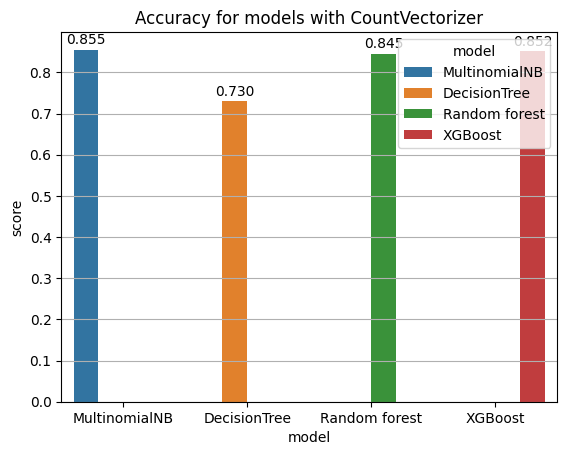

In [126]:
plt.grid()
ax = sns.barplot(x='model', y='score', hue='model', data=df)
plt.title('Accuracy for models with CountVectorizer')

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.3f}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='center',  
        xytext=(0, 7),
        textcoords='offset points'
    )

plt.show()

***************************************************************

## TfidfVectorizer

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFidf_vectorizer = TfidfVectorizer()

### MultinomialNB

In [128]:
pipeline = Pipeline([('vectorizer', TFidf_vectorizer),
                     ('classifier', multi_model)])

In [129]:
cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
                           scoring='accuracy', return_estimator=True)

In [130]:
best_muti_estimator = cv_results['estimator'][cv_results['test_score'].argmax()]

In [132]:
y_pred = best_muti_estimator.predict(X_val)

In [133]:
multi_accuracy_TFidf = accuracy_score(y_pred, y_val)

print(f"\nValidation set accuracy: {multi_accuracy_TFidf:.4f}")


Validation set accuracy: 0.8580


### DecisionTree

In [135]:
pipeline = Pipeline([('vectorizer', TFidf_vectorizer),
                     ('classifier', dec_tree_model)])

In [136]:
cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
                           scoring='accuracy', return_estimator=True)

In [137]:
best_tree_estimator = cv_results['estimator'][cv_results['test_score'].argmax()]

In [138]:
y_pred = best_tree_estimator.predict(X_val)

In [139]:
dec_accuracy_TFidf = accuracy_score(y_pred, y_val)

print(f"\nValidation set accuracy: {dec_accuracy_TFidf:.4f}")


Validation set accuracy: 0.7128


### Random forest

In [140]:
pipeline = Pipeline([('vectorizer', TFidf_vectorizer),
                     ('classifier', RF_model)])

In [141]:
cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
                           scoring='accuracy', return_estimator=True)

In [142]:
best_RF_estimator = cv_results['estimator'][cv_results['test_score'].argmax()]

In [143]:
y_pred = best_RF_estimator.predict(X_val)

In [145]:
RF_accracy_TFidf = accuracy_score(y_pred, y_val)

print(f"\nValidation set accuracy: {RF_accracy_TFidf:.4f}")


Validation set accuracy: 0.8428


### XGBoost

In [146]:
pipeline = Pipeline([('vectorizer', TFidf_vectorizer),
                     ('classifier', xgb_model)])

In [147]:
cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
                           scoring='accuracy', return_estimator=True)

In [148]:
best_xgb_estimator = cv_results['estimator'][cv_results['test_score'].argmax()]

In [149]:
y_pred = best_xgb_estimator.predict(X_val)

In [150]:
xgb_accuracy_TFidf = accuracy_score(y_pred, y_val)

print(f"\nValidation set accuracy: {xgb_accuracy_TFidf:.4f}")


Validation set accuracy: 0.8466


*************************************************************

In [151]:
TFidf_scores = [multi_accuracy_TFidf, dec_accuracy_TFidf, RF_accracy_TFidf, xgb_accuracy_TFidf]

In [152]:
TFidf_scores

[0.858, 0.7128, 0.8428, 0.8466]

In [153]:
df2 = {'model':models, 'score':TFidf_scores}

In [154]:
df2 = pd.DataFrame(df2)

In [155]:
df2

,model,score
0,MultinomialNB,0.8580
1,DecisionTree,0.7128
2,Random forest,0.8428
3,XGBoost,0.8466


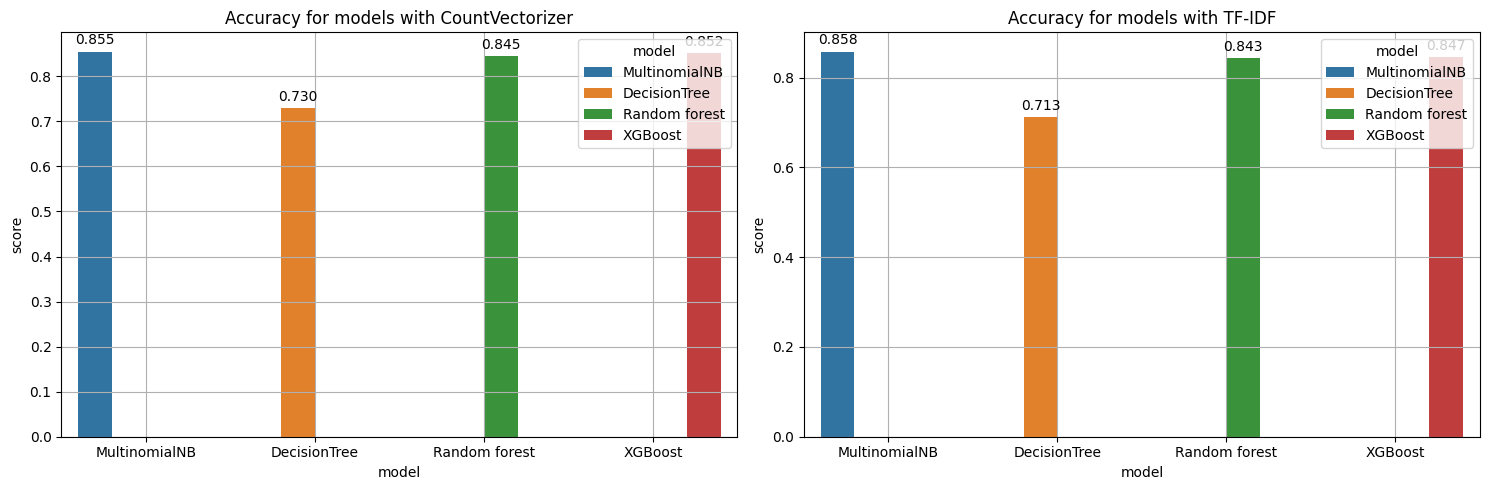

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(ax=axes[0], x='model', y='score', hue='model', data=df)
axes[0].set_title('Accuracy for models with CountVectorizer')
axes[0].grid(True)


for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.3f', padding=3)  

sns.barplot(ax=axes[1], x='model', y='score', hue='model', data=df2)
axes[1].set_title('Accuracy for models with TF-IDF')
axes[1].grid(True)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

#### The best model is * MultinomialNB * with TF-IDF feature extraction, so we'll use it

***************************************************************

## Developed the Model

In [158]:
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])


param_grid = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  
    'vectorizer__min_df': [1, 2, 5],  
    'classifier__alpha': [0.1, 0.5, 1.0, 2.0],  
    'classifier__fit_prior': [True, False]  
}


grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5,  
    scoring='accuracy',
    n_jobs=-1  
)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


y_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)
print(f"Tuned Validation Accuracy: {val_accuracy:.4f}")

Best parameters: {'classifier__alpha': 2.0, 'classifier__fit_prior': False, 'vectorizer__max_features': 10000, 'vectorizer__min_df': 5, 'vectorizer__ngram_range': (1, 2)}
Tuned Validation Accuracy: 0.8618


In [159]:
from joblib import dump

dump(best_model, 'multinomial_nb_tfidf.joblib')

['multinomial_nb_tfidf.joblib']

*******************************************************

In [160]:
def predict_df(data):


    data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

    text = remove_strang(data['text'])

    tokenize_text = tokenization(text)

    filtered_text = stopword_removal(tokenize_text)

    stemm_text = Stemming(filtered_text)

    data['text'] = pd.DataFrame(make_df(stemm_text))

    X = data['text']

    y_pred = model.best_model(X)

    return y_pred

**************************************************

In [161]:
stop_words = set(stopwords.words('english'))
stop_words.update(['film', 'move', 'br', 'one', 'character'])
stop_words.remove('not')
stop_words.remove('no')
stop_words = stop_words - negation_exceptions

def predict_smple(sample):

    sample = sample.lower()

    sample = re.sub("[^a-z\s\']", "", sample)

    pattern = r'\b\w*(\w)\1{2, }\w*\\b|\b\w{1}\b'

    sample = re.sub(pattern, '', sample)

    token_sample = word_tokenize(sample)

    filtered_sample = [word for word in token_sample if word not in stop_words]

    ps = PorterStemmer()
    stemm_text = [ps.stem(word) for word in filtered_sample]

    sample = ' '.join(stemm_text)

    sample = [sample]

    X = sample

    y = best_model.predict(X)

    if y == 1:
        print('           Positive')
        img = Image.open('positive.png')

    elif y == 0:
        print('           Negative')
        img = Image.open('negative.png')


    return display(img)


           Positive


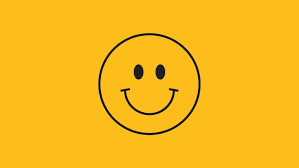

None


In [202]:
sample1 = "it was good"
print(predict_smple(sample1))

           Negative


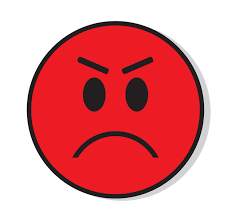

None


In [198]:
sample2 = "it wasnt good"
print(predict_smple(sample2))

*******************************************************************************************

# 6. Data preprocessing & building DL Models:

## Data Preparation

In [164]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [169]:
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

In [171]:
X_train_seq[0]

[1882,
 10,
 25,
 6585,
 2369,
 311,
 10,
 29,
 6585,
 311,
 4618,
 311,
 45,
 949,
 12,
 45,
 1584,
 1047,
 792,
 378,
 589,
 470,
 360,
 9,
 2,
 188,
 13,
 8,
 2009,
 25,
 464,
 9507,
 297,
 262,
 91,
 6260,
 448,
 1436,
 3,
 35,
 483,
 98,
 435,
 6585,
 476,
 343,
 2001,
 1634,
 617,
 914,
 60,
 29,
 3621,
 137,
 8854,
 1967,
 260,
 331,
 275,
 72,
 2320,
 220,
 144,
 3290,
 222,
 1507,
 1711,
 1435,
 802,
 121,
 699,
 1421,
 495,
 2460,
 3950]

In [170]:
len(X_train_seq)

39723

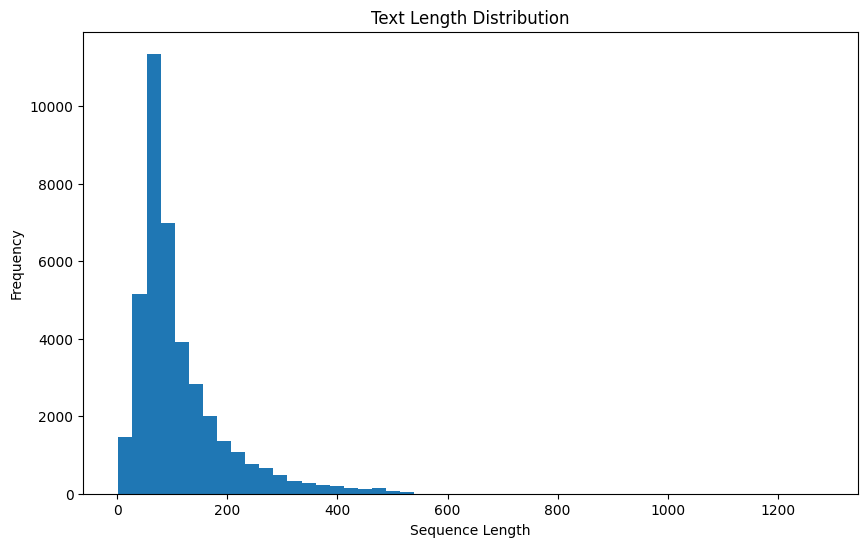

50th percentile: 84.0
90th percentile: 221.0
95th percentile: 288.0
99th percentile: 437.0
Max length: 1282

Recommended max_len: 288


In [172]:
train_lengths = [len(seq) for seq in X_train_seq]

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(train_lengths, bins=50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()


import numpy as np
print(f"50th percentile: {np.percentile(train_lengths, 50)}")
print(f"90th percentile: {np.percentile(train_lengths, 90)}")
print(f"95th percentile: {np.percentile(train_lengths, 95)}")
print(f"99th percentile: {np.percentile(train_lengths, 99)}")
print(f"Max length: {max(train_lengths)}")


max_len = int(np.percentile(train_lengths, 95)) 
print(f"\nRecommended max_len: {max_len}")

In [177]:
# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')

In [178]:
X_train_pad[0]

array([1882,   10,   25, 6585, 2369,  311,   10,   29, 6585,  311, 4618,
        311,   45,  949,   12,   45, 1584, 1047,  792,  378,  589,  470,
        360,    9,    2,  188,   13,    8, 2009,   25,  464, 9507,  297,
        262,   91, 6260,  448, 1436,    3,   35,  483,   98,  435, 6585,
        476,  343, 2001, 1634,  617,  914,   60,   29, 3621,  137, 8854,
       1967,  260,  331,  275,   72, 2320,  220,  144, 3290,  222, 1507,
       1711, 1435,  802,  121,  699, 1421,  495, 2460, 3950,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [179]:
len(X_train_pad)

39723

## Model Building and Comparison

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Common parameters
vocab_size = 10000
embedding_dim = 128

# Callback to save best model based on val_loss
checkpoint = ModelCheckpoint('best_DL_model.keras', 
                            monitor='val_loss', 
                            save_best_only=True, 
                            mode='min',
                            verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=3)

### LSTM Model

In [186]:
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

In [187]:
lstm_model.compile(loss='binary_crossentropy', 
                 optimizer=Adam(1e-4), 
                 metrics=['accuracy'])

In [192]:
lstm_history = lstm_model.fit(X_train_pad, y_train,
                             epochs= 3,
                             batch_size= 64,
                             validation_data=(X_val_pad, y_val),
                             callbacks=[checkpoint, early_stop])

Epoch 1/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.6159 - loss: 0.6536
Epoch 1: val_loss improved from 0.69237 to 0.60940, saving model to best_DL_model.keras
621/621 ━━━━━━━━━━━━━━━━━━━━ 269s 433ms/step - accuracy: 0.6159 - loss: 0.6536 - val_accuracy: 0.7076 - val_loss: 0.6094
Epoch 2/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.6995 - loss: 0.6110
Epoch 2: val_loss improved from 0.60940 to 0.59458, saving model to best_DL_model.keras
621/621 ━━━━━━━━━━━━━━━━━━━━ 262s 421ms/step - accuracy: 0.6995 - loss: 0.6110 - val_accuracy: 0.7196 - val_loss: 0.5946
Epoch 3/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.6507 - loss: 0.6275
Epoch 3: val_loss did not improve from 0.59458
621/621 ━━━━━━━━━━━━━━━━━━━━ 264s 425ms/step - accuracy: 0.6506 - loss: 0.6275 - val_accuracy: 0.5158 - val_loss: 0.6850


In [193]:
loss, acc = lstm_model.evaluate(X_val_pad, y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.5160 - loss: 0.6848


### Bidirectional LSTM

In [195]:
checkpoint = ModelCheckpoint('best_bid_model.keras', 
                                monitor='val_loss', 
                                save_best_only=True, 
                                mode='min',
                                verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [196]:
Bidirectional_model = Sequential()
Bidirectional_model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
Bidirectional_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
Bidirectional_model.add(Dense(1, activation='sigmoid'))

In [197]:
Bidirectional_model.compile(loss='binary_crossentropy', 
                             optimizer=Adam(1e-4), 
                             metrics=['accuracy'])

In [198]:
bilstm_history = Bidirectional_model.fit(X_train_pad, y_train,
                                         epochs=3,
                                         batch_size=64,
                                         validation_data=(X_val_pad, y_val),
                                         callbacks=[checkpoint, early_stop])

Epoch 1/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.6044 - loss: 0.6540
Epoch 1: val_loss improved from inf to 0.36696, saving model to best_bid_model.keras
621/621 ━━━━━━━━━━━━━━━━━━━━ 416s 663ms/step - accuracy: 0.6045 - loss: 0.6539 - val_accuracy: 0.8548 - val_loss: 0.3670
Epoch 2/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.8548 - loss: 0.3739
Epoch 2: val_loss improved from 0.36696 to 0.32704, saving model to best_bid_model.keras
621/621 ━━━━━━━━━━━━━━━━━━━━ 413s 665ms/step - accuracy: 0.8548 - loss: 0.3738 - val_accuracy: 0.8670 - val_loss: 0.3270
Epoch 3/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.8813 - loss: 0.3147
Epoch 3: val_loss improved from 0.32704 to 0.31946, saving model to best_bid_model.keras
621/621 ━━━━━━━━━━━━━━━━━━━━ 419s 674ms/step - accuracy: 0.8813 - loss: 0.3147 - val_accuracy: 0.8704 - val_loss: 0.3195


In [199]:
loss, acc = Bidirectional_model.evaluate(X_val_pad, y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.8683 - loss: 0.3252


### test model

In [201]:
checkpoint = ModelCheckpoint('best_model.keras', 
                                monitor='val_loss', 
                                save_best_only=True, 
                                mode='min',
                                verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [204]:
import keras

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    keras.layers.Bidirectional(keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [205]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [206]:
history = model.fit(X_train_pad, y_train,
                     epochs=3,
                     batch_size=64,
                     validation_data=(X_val_pad, y_val),
                     callbacks=[checkpoint, early_stop])

Epoch 1/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - accuracy: 0.7456 - loss: 0.5041
Epoch 1: val_loss improved from inf to 0.34076, saving model to best_model.keras
621/621 ━━━━━━━━━━━━━━━━━━━━ 440s 703ms/step - accuracy: 0.7457 - loss: 0.5040 - val_accuracy: 0.8624 - val_loss: 0.3408
Epoch 2/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 696ms/step - accuracy: 0.8830 - loss: 0.3037
Epoch 2: val_loss improved from 0.34076 to 0.33723, saving model to best_model.keras
621/621 ━━━━━━━━━━━━━━━━━━━━ 443s 713ms/step - accuracy: 0.8830 - loss: 0.3037 - val_accuracy: 0.8702 - val_loss: 0.3372
Epoch 3/3
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.8904 - loss: 0.2828
Epoch 3: val_loss improved from 0.33723 to 0.32642, saving model to best_model.keras
621/621 ━━━━━━━━━━━━━━━━━━━━ 431s 693ms/step - accuracy: 0.8904 - loss: 0.2828 - val_accuracy: 0.8716 - val_loss: 0.3264


In [207]:
loss, acc = model.evaluate(X_val_pad, y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.8710 - loss: 0.3319


*************************************

### Models Comparsion

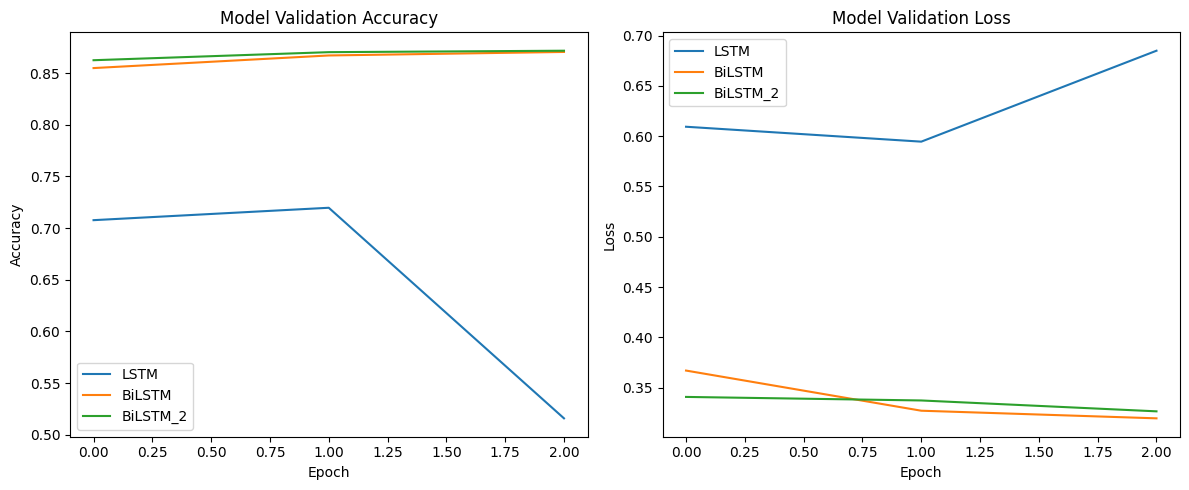

In [208]:
def plot_history(histories, labels):
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=label)
    plt.title('Model Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=label)
    plt.title('Model Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

histories = [lstm_history, bilstm_history, history]
labels = ['LSTM', 'BiLSTM', 'BiLSTM_2']
plot_history(histories, labels)

*********************************************

### Try the best model on new sample


In [250]:
stop_words = set(stopwords.words('english'))
stop_words.update(['br', 'one', 'character', 'film', 'movie'])
stop_words.remove('not')
stop_words.remove('no')
stop_words = stop_words - negation_exceptions


def predict_sentiment1(sample):


    sample = sample.lower()

    sample = re.sub("[^a-z\s\']", "", sample)

    pattern = r'\b\w*(\w)\1{2, }\w*\\b|\b\w{1}\b'

    sample = re.sub(pattern, '', sample)

    token_sample = word_tokenize(sample)

    filtered_sample = [word for word in token_sample if word not in stop_words]

    ps = PorterStemmer()
    stemm_text = [ps.stem(word) for word in filtered_sample]

    sample = ' '.join(stemm_text)

    sample = [sample]

    text = sample

    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen = 200)

    prediction = model.predict(padded_sequence)

    #prediction = np.argmax(prediction, axis=1)

    if prediction >= 0.5:
        print('           Positive')
        img = Image.open('positive.png')

    else:
        print('           Negative')
        img = Image.open('negative.png') 

    return display(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
           Negative


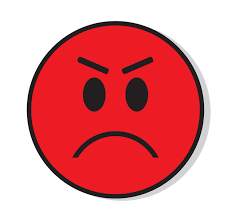

In [251]:
sample3 = "it wasnt a good filme"
predict_sentiment1(sample3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
           Positive


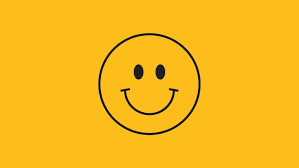

In [253]:
predict_sentiment1("it was a good film")

                                                                        :)